<h3>
<center> درس پردازش زبان‌های طبیعی </center>
<center> تمرین سری سوم </center>
<center> تشخیص احساس نظرات طاقچه </center>
<center> ترم بهار 1403-1402 </center>
</h3>


<h4 style='direction:rtl;'>
    شماره گروه: 18
</h4>
<div style='direction:rtl;'>
    <b>اعضای تیم:<br></b>
    امیر شکوری (402206437)<br>   
    زهرا ملکی (402206183)<br>
    حامد جهانتیغ (401212324)
</div>


<h2 style='direction:rtl;'>
    # معرفی
</h2>
<div style="direction: rtl;">
در این تمرین تحلیل احساس نظرات طاقچه مد نظر می باشد. تمرین در دو دسته اصلی طبقه بندی متن و طبقه بندی کلمه انجام شده است. به طور کلی سه بخش اصلی گزارش به شرح زیر می باشد:
<ol>
  <li>آماده سازی داده ها</li>
  <li>طبقه بندی سند</li>
  <li>طبقه بندی کلمه</li>
</ol>
</div>

<div style="direction: rtl;">
برای عدم وجود مشکل در اجرا، تمامی کتابخانه های استفاده شده در فایل <i>requirements.txt</i> قرار گرفته است که در اینجا فرآیند نصب انجام می شود. همچنین کتابخانه های مورد استفاده در فایل نوت بوک گزارش هر کدام در بخش مورد نیاز خود فراخوانی می شود.
</div>

In [ ]:
! pip install -r requirements.txt

In [3]:
from config.path import *
import pandas as pd


<h2 style='direction:rtl;'>
    # آماده سازی داده ها
</h2>
<div style="direction: rtl;">
در این بخش، تلاش شده تا داده ها متناسب با تسک های تعریف شده آماده شوند و عملیات پیش پردازش و تکمیل داده ها انجام شود. برای تحقق این امر روند زیر طی شده است:
<ol>
<li>تکمیل داده ها با استخراج اطلاعات تکمیلی نویسندگان، مترجمان و انتشارات</li>
<li>تحلیل داده ها برای متناسب سازی 5 سطح از رتبه بندی(تعیین هایپرپارامتر)</li>
<li>تمیزسازی اولیه داده های نظرات متناسب با تسک های تعریف شده</li>
</ol>
</div>

<h3 style='direction:rtl;'>
    ## تکمیل داده ها با استخراج اطلاعات تکمیلی نویسندگان، مترجمان و انتشارات
</h3>
<div style="direction: rtl;">
برای تکمیل داده ها، از یک کرالر پایتون استفاده شده است که پیاده سازی آن در پکیج های <i>data</i> فایل <i>data_processor.py, crawler.py</i> قرار دارد.

در این کرالر سعی شد تا اسامی نویسندگان، مترجمان و انتشارات کتاب های موجود در دیتاست اصلی استخراج شوند. نتیجه ی این کرالر در فایل atp.csv قابل مشاهده است که اطلاعات حدود ۱۱۵۰۰ کتاب مختلف در آن جمع آوری شده است.


جهت ایجاد یک دیتاست مناسب برای مدل پایه طبقه بندی کلمه، از دیتاست های persian_ner و arman استفاده شد که در این امر، اطلاعات مرتبط با حوزه ی کتاب از دیتاست arman استخراج و به دیتای مورد نیاز در دیتاست persian_ner اضافه شدند تا یک دیتاست یک دست و مرتبط با مسئله داشته باشیم.
</div>

<h3 style='direction:rtl;'>
    ## تکمیل داده ها با استخراج اطلاعات تکمیلی نویسندگان، مترجمان و انتشارات
</h3>
<div style="direction: rtl;">
برای تکمیل داده ها، از یک کرالر پایتون استفاده شده است که پیاده سازی آن در پکیج های <i>data</i> فایل <i>data_processor.py, crawler.py</i> قرار دارد.

در این کرالر سعی شد تا اسامی نویسندگان، مترجمان و انتشارات کتاب های موجود در دیتاست اصلی استخراج شوند. نتیجه ی این کرالر در فایل atp.csv قابل مشاهده است که اطلاعات حدود ۱۱۵۰۰ کتاب مختلف در آن جمع آوری شده است.


جهت ایجاد یک دیتاست مناسب برای مدل پایه طبقه بندی کلمه، از دیتاست های persian_ner و arman استفاده شد که در این امر، اطلاعات مرتبط با حوزه ی کتاب از دیتاست arman استخراج و به دیتای مورد نیاز در دیتاست persian_ner اضافه شدند تا یک دیتاست یک دست و مرتبط با مسئله داشته باشیم.
</div>

<h3 style='direction:rtl;'>
    ##تحلیل داده ها برای متناسب سازی 5 سطح از رتبه بندی(تعیین هایپرپارامتر)
</h3>
<div style="direction: rtl;">
برای تعیین هایپر پارامتر حالت های مختلفی وجود دارد، باتوجه به توزیع داده ها و سیاق جملات در 4 حالت مرزها بررسی می شود. روند بررسی بدین صورت است که در هر حالت مدل ParsBert براساس داده های دسته بندی حالات مختلف آموزش داده می شود. تنطیمات برای انجام این فرآیند به شرح زیر است:
</div>

In [ ]:
batch_size = 16
epochs = 1
logging_steps = 100
save_steps_perc = 0.25
learning_rate = 5e-5

<div style="direction: rtl;">
درنهایت نتایج برای حالات به شرح زیر اقدام می شود:
<li>مثبت: 4-5، خنثی: 2-3، منفی: 0-1 -> 72.0% با داده بالانس 10074 </li>
<li>مثبت: 5، خنثی: 2-4، منفی: 0-1 -> 72.6% با داده بالانس 10074 </li>
<li>مثبت: 5، خنثی: 3-4، منفی: 0-2 -> 69.7% با داده بالانس 13868 </li>
<li>مثبت: 5، خنثی: 4، منفی: 0-3 -> 68.7% با داده بالانس 9356 </li>
در نتیجه دسته بندی حالت دوم عملکرد بهتری را ایجاد می کند.
</div>

<h3 style='direction:rtl;'>
    ## تمیزسازی اولیه داده های نظرات متناسب با تسک های تعریف شده
</h3>
<div style="direction: rtl;">
برای بررسی کلمات زائد موجود در کامنت ها، ابتدا یک تحلیل فرکانس انجام شد. در این تحلیل که کد آن در ماژول frequency.ipynb و نتیجه ی نهایی آن در stop_words_frequency_with_margin.csv قرار دارد، با محاسبه ی اختلاف بیشترین میزان استفاده از هر کلمه ی زائد در کتگوری های مختلف، با میانگین میزان استفاده از آن کلمه در تمامی کامنت ها، اثرگذاری و ارزش آن کلمه بررسی شد. 

 برای مثال در سطر زیر نرخ استفاده از کلمه ی گرفته در کتگوری خوب ۱۳.۷۷ درصد بیشتر از میانگین استفاده از این کلمه در تمام کامنت هاست و با در نظر داشتن یک margin حدودا بیست درصدی، این کلمه حاوی اطلاعات چندان زیادی نیست و میتوان از ارزش آن در کلمات چشم پوشی کرد.

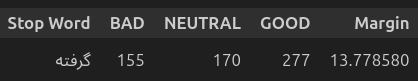


</div>
|


<h2 style='direction:rtl;'>
    # طبقه بندی سند
</h2>
<div style="direction: rtl;">
همان طور که در این فعالیت مشخص شده است، هدف تعیین دسته نظر نرم افزار طاقچه در یکی از دسته های مثبت، منفی و خنثی می باشد. برای انجام این فعالیت از دو مدل پایه و اصلی استفاده شده است که هرکدام در این بخش شرح داده می شود. همچنین برای این فعالیت لازم است تا برخی موارد از جمله تعیین هایپرپارامتر مرزی نظر، انتخاب کلمات بی اثر در احساس نظرات انجام شود که در بخش آماده سازی داده ها انجام شده است.
</div>

<h3 style='direction:rtl;'>
    ## مدل پایه
</h3>
<div style="direction: rtl;">
در این بخش کلاس DocBaseModel پیاده سازی شده که در آن ابتدا دادگان بر اساس مرزبندی گفته شده روی ستون rate دسته بندی(categorize) می شوند. سپس بردار tf-idf ایجاد شده فرایند پیش پردازش انجام می شود.

فرایند پیش پردازش دادگان شامل نرمالسازی کلمات، حذف برخی کلمات شامل اموجی ها، اعداد و stopwordها و در نهایت کلمه کلمه سازی است.

پس از انجام پیش پردازش با استفاده از تکنیک oversampling دادگان را متعادل(balance) می کنیم.(به دلیل متعادل نبودن تعداد دادگان هر دسته)

در نهایت با استفاده از مدل naive bayes و تکنیک cross_validation فرایند آموزش را انجام می دهیم.


<h4> نتایج</h4>
پس از اجرای مدل، بر اساس معیارهای ارزیابی نتایج زیر به دست آمدند:
</div>
Accuracy: 0.7341618882320847<br>
Precision (Macro): 0.7327678622348551<br>
Recall (Macro): 0.7341135534607575<br>
F1 Score (Macro): 0.732412323288311<br>
F1 Score (Micro): 0.7341618882320847<br>

Naive Bayes Classifier - Confusion Matrix:<br>
[[3624  142  162]<br>
 [ 828 2296  864]<br>
 [ 415  438 3079]]<br>

<h3 style='direction:rtl;'>
    ## مدل اصلی
</h3>
<div style="direction: rtl;">
در این بخش برای تحلیل احساسات از یک مدل برپایه ترنسفورمر استفاده می شود. 
</div>

<div style="direction: rtl;">
 <b>1- گام اول:</b>
  </br>
 اولین قدمی که برای تعیین مدل برداشته شده است، انتخاب مدل است. در این مرحله از دو کاندید برای خانوادی BERT استفاده  و بر روی یک دیتای پایه ای ثابت آموزش انجام شد تا بتوان این دو مدل را مقایسه کرد. هر دو مدل بر اساس دفترچه transformer_classification.ipynb آموزش داده میشوند و از سری مدل های موجود در Huggingface هستند. 
</div>


In [ ]:
bert_name = "bert-base-multilingual-cased"
pars_name = "HooshvareLab/bert-base-parsbert-uncased"

<div style="direction: rtl;">
در نهایت مدل اول (مدل پایه ای BERT برای کاربردهای چندزبانه) دارای دقت کمتری از مدل توسعه پیدا کرده برای زبان فارسی برپایه BERT (با نام ParsBERT) می باشد. این دقت برای داده آموزشی مبنا به ترتیب برابر 64% و  81% می باشد. بنابراین مدل انتخابی ParsBERT خواهد بود.
</div>

<div style="direction: rtl;">
 <b>2- گام دوم:</b>
</br>
در گام دوم، استراتژی آموزش مشخص می شود. با توجه به حجم اطلاعات موجود، یکی از مواردی که باعث بهبود دقت مدل می شود، ثابت نگاه داشتن ضرایت لایه های پایین که دارای دانش کلی زبان هستند و فاین تیون کردن لایه های بالایی متناسب با داده های فعالیت می باشد. در همین راستا مدل برگزیده (ParsBERT) در چهار سناریو زیر مورد ارزیابی قرار میگیرد:
<li>بدون انجماد لایه ها و فاین تیون کردن کل شبکه</li>
<li> انجماد لایه های 1-3 و فاین تیون لایه های بالاتر</li>
<li> انجماد لایه های 1-6 و فاین تیون لایه های بالاتر</li>
<li> انجماد لایه های 1-9 و فاین تیون لایه های بالاتر</li>
در نهایت دقت برای نمونه داده آموزش برای هر سناریو به ترتیب 81.1%، 80.7%، 80.4% و 80.9% می باشد. هممچنین زمان آموزش شبکه برای همه سناریوها در یک مرتبه قرار دارد.
به همین علت در این بخش تفاوتی در انتخاب سناریو یافت نشد. لازم به ذکر است در پیاده سازی این سناریوها در مدل پایه ای BERT تفاوت ایجاد شده ملموس است؛ به عنوان مثال دقت در حالت بدون انجماد از 64% به 75% در حالت انجماد لایه های 1-6 می رسد. احتمالا در مدل ParsBERT براساس فاین تیون شدن اختصاصی برای زبان فارسی این تفاوت در سناریو دیگر وجود ندارد.
</div>


<div style="direction: rtl;">
 <b>3- گام سوم:</b>
</br> 
در این مرحله متناسب با سناریو انتخابی و هایپر پارامتر تعیین شده، مدل آموزش داده می شود. تنظیمات کلی مدل به شرح زیر است:
</div>


In [ ]:
batch_size = 16
epochs = 5
logging_steps = 100
save_steps_perc = 0.25
learning_rate = 5e-5

<div style="direction: rtl;">
 <b>نتایج و دقت مدل</b>
</br> 
در نهایت دقت مدل بر روی تقریبا 30 هزار داده با نسبت 8،1،1 به  داده های آموزش، اعتبارسنجی و آزمون به شرح زیر است:
<li>F1 Score: 0.799</li>
<li>Accuracy: 0.800</li>
<li>Precision: 0.801</li>
<li>Recall: 0.800</li>
<li>
Confusion Matrix:
[[831 128  90]
 [ 82 756 116]
 [ 57 131 832]]
</li>
در نهایت مدل در نشانی زیر در Huggingface بارگزاری گردید.

https://huggingface.co/hamedjahantigh/TaaghcheFeelingCommentAnalysis
</div>



<h2 style='direction:rtl;'>
    # طبقه بندی کلمات
</h2>
<div style="direction: rtl;">
همان طور که در این فعالیت مشخص شده است، هدف ایجاد تگ BIO می باشد.
 برای انجام این فعالیت از دو مدل پایه و اصلی استفاده شده است که هرکدام در این بخش شرح داده می شود. همچنین برای این فعالیت لازم است تا داده های آن تکمیل و آماده شود که در بخش اول به آن پرداخته شده است.
</div>


<h3 style='direction:rtl;'>
# مدل پایه
</h3>
<div style="direction: rtl;">
Todo kahnom maleki
</div>


<h3 style='direction:rtl;'>
# مدل اصلی
</h3>
<div style="direction: rtl;">
در این بخش برای ایجاد یک تگ BIO از یک مدل برپایه ترنسفورمر و مدل ParsBERT استفاده می شود. تگ های استفاده شده در این بخش 
['O' 'B-DAT' 'I-DAT' 'B-PER' 'I-PER' 'B-ORG' 'I-ORG' 'B-LOC' 'I-LOC'
 'B-EVE' 'I-EVE' 'B-BOOK' 'I-BOOK']
 می باشد. همچنین تنظیمات اولیه مدل در پایین آورده شده است.
</div>

In [ ]:
MAX_LEN = 128
BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 3e-5
logging_steps = 100


<div style="direction: rtl;">
 <b>نتایج و دقت مدل</b>
</br> 
در نهایت دقت مدل بر روی تقریبا 150 هزار کلمه با نسبت 8،1،1 به داده های آموزش، اعتبارسنجی و آزمون به شرح زیر است:
</div>
F1 Score: 0.3534761203704847<br/>
Accuracy: 0.8980074083535573<br/>
Precision: 0.48302243550652585<br/>
Recall: 0.3239270904426163<br/>

Confusion Matrix:<br/>
[[  0  14   0   0   0   0   0   0   0   0   0   0  0   0]<br/>
 [  0 13309   3  80  53  53  20  27   183  16   4  10  0   4]<br/>
 [  0   191  25  72   0   0   0   0   0   0   0   0  0   0]<br/>
 [  0   144   9   386   0   0   0   0   0   0   0   1  0   0]<br/>
 [  0  51   0   0  93   8   0   0   0   1   0   0  0   0]<br/>
 [  0  68   0   3  11  56   0   0   2   1   0   0  0   0]<br/>
 [  0  46   0   0   0   0  18   1   0   0   0   0  0   0]<br/>
 [  0  43   0   1   0   1   1  14   6   2   0   1  0   1]<br/>
 [  0   166   0   0   0   1   2   0   124   2   0   0  0   0]<br/>
 [  0   131   0   0   1  17   2   2  34  18   0   0  0   0]<br/>
 [  0  10   0   0   0   0   1   0   0   0   6   0  0   0]<br/>
 [  0  14   0   0   0   0   0   1   1   0   0   4  0   0]<br/>
 [  0  24   0   0   0   0   0   0   0   0   0   0  5   0]<br/>
 [  0  49   0   1   0   2   0   0   1   0   0   1  2   3]]<br/>

<div style="direction: rtl;">
در نهایت مدل در نشانی زیر در Huggingface بارگزاری گردید.

https://huggingface.co/hamedjahantigh/TaaghcheBIOTag
</div>


## مدل HMM


### ۱. بارگذاری و آماده‌سازی داده‌ها:
- دو فایل متنی شامل جملات آموزش و تست از دو منبع مختلف بارگذاری شدند.
- داده‌ها به صورت جملات توکن‌بندی شده و برچسب‌گذاری شده استخراج شدند.
- جملات آموزشی به صورت دستی متوقف شدند تا از طولانی شدن بیش از حد فرآیند جلوگیری شود.

### ۲. پردازش داده‌ها:
- جملات و برچسب‌ها به صورت جداگانه برای مجموعه‌های آموزش و تست ذخیره شدند.
- توکن‌ها و برچسب‌ها از جملات استخراج و به لیست‌های جداگانه‌ای تبدیل شدند.

### ۳. برچسب‌گذاری و کدگذاری:
- توکن‌ها و برچسب‌ها با استفاده از LabelEncoder از کتابخانه sklearn کدگذاری شدند.
- جملات توکن‌بندی شده به فرمت قابل استفاده برای HMM تبدیل شدند.

### ۴. ساخت و آموزش مدل:
- یک مدل HMM با استفاده از کتابخانه hmmlearn ساخته و با داده‌های آموزشی آموزش داده شد.
- مدل نهایی ذخیره شد تا در آینده مورد استفاده قرار گیرد.

### ۵. ارزیابی مدل:
- داده‌های تست با استفاده از مدل پیش‌بینی شدند.
- دقت، F1-score، Precision و Recall برای مدل محاسبه و گزارش شدند.
- ماتریس درهم‌ریختگی (Confusion Matrix) برای تحلیل عملکرد مدل ترسیم شد.

### نتایج:
- مدل توانست دقت، F1-score، Precision و Recall مناسبی را برای شناسایی موجودیت‌های نام‌دار ارائه دهد.
- ماتریس درهم‌ریختگی نشان‌دهنده‌ی عملکرد مدل در پیش‌بینی صحیح برچسب‌ها بود.

### ارزیابی مدل
- پس از آماده‌سازی داده‌ها و آموزش مدل، با استفاده از داده‌های تست، عملکرد مدل ارزیابی شد.
- مقادیر مختلف از جمله دقت، F1-score، Precision و Recall محاسبه و گزارش شدند.
- همچنین، ماتریس درهم‌ریختگی به صورت گرافیکی ترسیم شد تا عملکرد مدل به صورت بصری بررسی شود.

### نتایج نهایی:
- Accuracy: 58.74%
- F1-macro score: 5.37%
- F1-micro score: 58.73%
- Precision-macro: 5.94%
- Precision-micro: 58.73%
- Recall-macro: 5.94%
- Recall-micro: 58.73%
